**Alice, Ethan, Cole**

Spring 2020

CS 443: Computational Neuroscience

Project 4: Motion estimation

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from motion import MotionNet,KernelParams, LayerParams, HGateParams
from random_dot_stimulus import make_random_dot_stimulus
from net_plots import vector_sum_plot, plot_act_image_grid



plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
#the following is full network code.
np.random.seed(0)
right_motion = make_random_dot_stimulus(n_frames=10, dir_rc=(0, 1))

# Define parameters
lvl1_params = LayerParams(tau=1, A=1)
lvl1_hgate_params = HGateParams(tau=1, K=50)
lvl2_inter_params = LayerParams(tau=1, excit_g=10, inhib_g=40)
lvl2_params = LayerParams(tau=4, excit_g=10, inhib_g=40, output_thres=0.2)
lvl3_params = LayerParams(tau=0.5, output_thres=0.002) 
lvl3_excit_ker_params = KernelParams(sigma=(2, 0.5), sz=(13, 13), gain=25)

lvl4_params = LayerParams(tau=5, C=0.5)
lvl4_excit_ker_params = KernelParams(sigma=(3, 1), sz=(19, 19), gain=5)
lvl4_inhib_ker_params = KernelParams(sigma=4, sz=(25, 25), gain=5)
# lvl5_params = LayerParams(tau=.5)
# lvl5_excit_ker_params = KernelParams(sigma=(2,0.5), sz=(52,52), gain=25)
# lvl6_params = LayerParams(tau=5, output_thres=0.002)
# lvl6_inhib_ker_params= KernelParams(sigma=4, sz=(52,52), gain = 5)

lvl6_params = LayerParams(tau=5, C=0.5, excit_g=2)
lvl6_inhib_ker_params = KernelParams(sigma=8, sz=(51, 51), gain=1)
lvl5_params = LayerParams(tau=5, C=0.5)
lvl5_excit_ker_params = KernelParams(sigma=(10, 3), sz=(51, 51), gain=2)


# Simulate net
net = MotionNet(dt=0.1, 
                n_dirs=8, 
                lvl1_params=lvl1_params, 
                lv1_hgate_params=lvl1_hgate_params, 
                lvl2_inter_params=lvl2_inter_params, 
                lvl2_params=lvl2_params,
                lvl3_excit_ker_params = lvl3_excit_ker_params,
                lvl3_params = lvl3_params, 
                lvl4_params=lvl4_params, 
                lvl4_excit_ker_params = lvl4_excit_ker_params, 
                lvl4_inhib_ker_params = lvl4_inhib_ker_params,
                lvl5_params = lvl5_params,
                lvl5_excit_ker_params = lvl5_excit_ker_params,
                lvl6_params = lvl6_params,
                lvl6_inhib_ker_params = lvl6_inhib_ker_params)
net.simulate(right_motion)
# Compute rectified layer output
mstd_out = net.mstd_out

In [ ]:
# Your grid of image plots of the layer 6 cells output over time
plot_act_image_grid(mstd_out[::5], n_rows=2, n_cols=4, pause=.00001, cmap='bone', figSz=(18, 9))

In [27]:
print(f'Your decoded evidence for each direction at the end of the simulation is\n{net.decode_direction(net.mstd_cells, -1)}\nand should roughly look like\n[402.962   0.149   0.      0.047   0.      0.453   0.17    0.027]')

Your decoded evidence for each direction at the end of the simulation is
[1.771 0.001 0.008 0.001 0.    0.001 0.    0.   ]
and should roughly look like
[402.962   0.149   0.      0.047   0.      0.453   0.17    0.027]


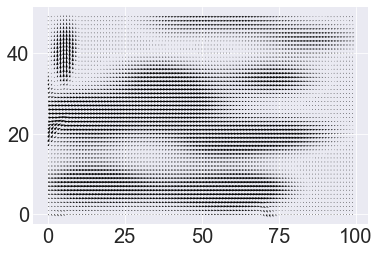

In [28]:
# Your vector sum plot of the layer 6 output over time
vector_sum_plot(mstd_out, figSz=(18, 9), pause=0.01)